In [18]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import Aer, IBMQ
import qiskit as qk

# import basic plot tools
from qiskit.tools.visualization import matplotlib_circuit_drawer as circuit_drawer
from qiskit.tools.visualization import plot_histogram, qx_color_scheme


In [9]:
# Saving and loading my account

#IBMQ.save_account(Qconfig.APItoken)
IBMQ.load_accounts()

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\backends\ibmq\ibmqprovider.py:258: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [19]:
# Backends availables
print("Available backends:")
IBMQ.backends()

Available backends:


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [11]:
from qiskit.backends.ibmq import least_busy

# Choosing the least busy backend
large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 3 and
                                                       not x.configuration()['simulator'])
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


In [69]:
# Creating registers
qr = QuantumRegister(14)
cr = ClassicalRegister(14)


In [70]:
# Quantum circuit superposition 
qc_superposition = QuantumCircuit(qr, cr)

# Applying the Hadamard gate
qc_superposition.h(qr)
qc_superposition.measure(qr[0], cr[0])
qc_superposition.measure(qr[1], cr[1])
qc_superposition.measure(qr[2], cr[2])
qc_superposition.measure(qr[3], cr[3])
qc_superposition.measure(qr[4], cr[4])
qc_superposition.measure(qr[5], cr[5])
qc_superposition.measure(qr[6], cr[6])
qc_superposition.measure(qr[7], cr[7])
qc_superposition.measure(qr[8], cr[8])
qc_superposition.measure(qr[9], cr[9])
qc_superposition.measure(qr[10], cr[10])
qc_superposition.measure(qr[11], cr[11])
qc_superposition.measure(qr[12], cr[12])
qc_superposition.measure(qr[13], cr[13])

In [71]:
# Measuring the qubit 1024 times
job = execute(qc_superposition, backend, shots = 1024)
result = job.result()

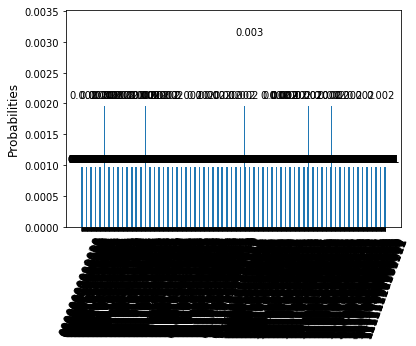

In [72]:
# Plotting the result
plot_histogram(result.get_counts(qc_superposition))